In [1]:
###  Training a Decision Tree Classifier

# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [2]:
# Load data

iris = datasets.load_iris()
features = iris.data
target = iris.target

In [3]:
# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)

In [4]:
# Make new observation
observation = [[ 5, 4, 3, 2]]

# Predict observation's class
model.predict(observation)

array([1])

In [5]:
# View predicted class probabilities for the three classes
model.predict_proba(observation)

array([[0., 1., 0.]])

In [6]:
### we can use a different criterion for classification

# Create decision tree classifier object using entropy
decisiontree_entropy = DecisionTreeClassifier(
criterion='entropy', random_state=0)

# Train model
model_entropy = decisiontree_entropy.fit(features, target)

In [8]:
### Training a Decision Tree Regressor

# Load libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

In [9]:
# Load data with only two features
boston = datasets.load_boston()
features = boston.data[:,0:2]
target = boston.target

In [10]:
# Create decision tree classifier object
decisiontree = DecisionTreeRegressor(random_state=0)

# Train model
model = decisiontree.fit(features, target)

In [11]:
# Make new observation
observation = [[0.02, 16]]

# Predict observation's value
model.predict(observation)

array([33.])

In [12]:
# Create decision tree classifier object using mean absolute error
decisiontree_mae = DecisionTreeRegressor(criterion="mae", random_state=0)
# Train model
model_mae = decisiontree_mae.fit(features, target)

In [14]:
### Training a Random Forest Classifier

# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)


In [15]:
# Make new observation
observation = [[ 5, 4, 3, 2]]

# Predict observation's class
model.predict(observation)

array([1])

In [17]:
# Create random forest classifier object using entropy
randomforest_entropy = RandomForestClassifier(
criterion="entropy", random_state=0)
# Train model
model_entropy = randomforest_entropy.fit(features, target)

In [18]:
### Training a Random Forest Regressor

# Load libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

# Load data with only two features
boston = datasets.load_boston()
features = boston.data[:,0:2]
target = boston.target

In [19]:
# Create random forest classifier object
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

In [24]:
### 6 Identifying Important Features in Random Forests

# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [35]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [39]:
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

# Calculate feature importances
importances = model.feature_importances_
importances

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

In [41]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
indices

array([2, 3, 0, 1], dtype=int64)

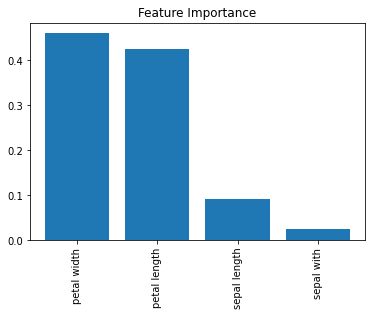

In [43]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(features.shape[1]), importances[indices])

names= ['petal width','petal length','sepal length','sepal with']
# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [44]:
### Selecting Important Features in Random Forests

##You need to conduct feature selection on a random forest.

# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target


In [46]:
# Create random forest classifier
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Create object that selects features with importance greater
# than or equal to a threshold
selector = SelectFromModel(randomforest, threshold=0.3)

# Feature new feature matrix using selector
features_important = selector.fit_transform(features, target)

# Train random forest using most important featres
model = randomforest.fit(features_important, target)

# Calculate feature importances
importances = model.feature_importances_
importances

array([0.51108238, 0.48891762])

In [47]:
####  Handling Imbalanced Classes

#### You have a target vector with highly imbalanced classes and want to train a
#random forest model.

# Load libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [52]:
# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]

# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)
target.shape

(70,)

In [53]:
# Create random forest classifier object
randomforest = RandomForestClassifier(
random_state=0, n_jobs=-1, class_weight="balanced")

In [55]:
# Train model
model = randomforest.fit(features, target)

In [56]:
## Controlling Tree Size

### You want to manually determine the structure and size of a decision tree.

# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [57]:
# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0,
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,
min_weight_fraction_leaf=0,
max_leaf_nodes=None,
min_impurity_decrease=0)

In [58]:
# Train model
model = decisiontree.fit(features, target)

In [60]:
### Improving Performance Through Boosting

# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create adaboost tree classifier object
adaboost = AdaBoostClassifier(random_state=0)

# Train model
model = adaboost.fit(features, target)

### note
#loss is exclusive to AdaBoostRegressor and sets the loss function to use
#when updating weights. This defaults to a linear loss function, but can be
#changed to square or exponential.

In [61]:
#### Evaluating Random Forests with Out-ofBag Errors

### You need to evaluate a random forest model without using cross-validation.

##Solution
#Calculate the model’s out-of-bag score:

# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create random tree classifier object
randomforest = RandomForestClassifier(
random_state=0, n_estimators=1000, oob_score=True, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

In [62]:
# View out-of-bag-error
randomforest.oob_score_

0.9533333333333334